<a href="https://colab.research.google.com/github/NRMitchell2002/BUS0007/blob/main/Loan_Eligibility_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:**

* Machine Learning task: Classification model
* Target variable: Loan_Status
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [63]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [64]:
# check the number of rows and observations
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

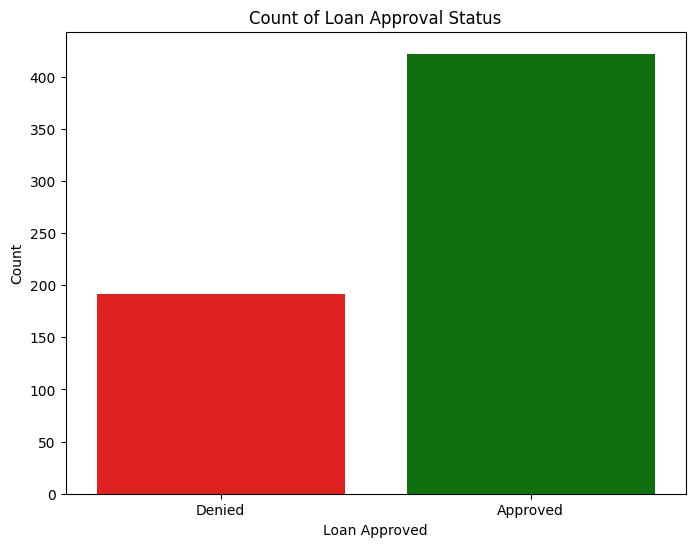

In [65]:
# How many application were approved and how many were denied? Plot a bar plot

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Approved', data=df, palette=['red', 'green'])

plt.title('Count of Loan Approval Status')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.xticks([0, 1], ['Denied', 'Approved'])  # Setting custom labels for clarity

plt.show()

### Data Prep

In [66]:
# drop 'Loan_ID' variable from the data. We won't need it.

# Dropping the 'Loan_ID' column from the dataset
df.drop('Loan_ID', axis=1, inplace=True)


In [70]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'
df=pd.get_dummies(df)

df





,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128,360,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66,360,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120,360,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71,360,1,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40,180,1,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253,360,1,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187,360,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [71]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [72]:
# Seperate the input features and target variable
X = df.drop('Loan_Approved', axis=1)  # Input features
y = df['Loan_Approved']               # Target variable



In [73]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# check the split if interested


# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [74]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [77]:
# Fit the model on the data
from sklearn.linear_model import LogisticRegression

# Creating an instance of the Logistic Regression model
logistic_model = LogisticRegression()

# Fitting the model on the training data
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [78]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy of the model: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]


In [79]:
# Print the confusion matrix
# Importing necessary functions
from sklearn.metrics import accuracy_score, confusion_matrix

# Making predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[18 25]
 [ 1 79]]


In [80]:
# check how probabilities are assigned
probabilities = logistic_model.predict_proba(X_test)

print(probabilities[:5])


[[0.09538493 0.90461507]
 [0.0791165  0.9208835 ]
 [0.21407143 0.78592857]
 [0.2471856  0.7528144 ]
 [0.1120749  0.8879251 ]]


In [81]:
# to change the default threshold and to make it 70% and above
#(y_pred[:, 1] >= 0.7).astype(int)

IndexError: ignored

## <font color='chocolate'>**2. Random Forest**

In [82]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Let's list the tunable hyperparameters for Random Forest algorithm


For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [83]:
# Fit a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)